In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


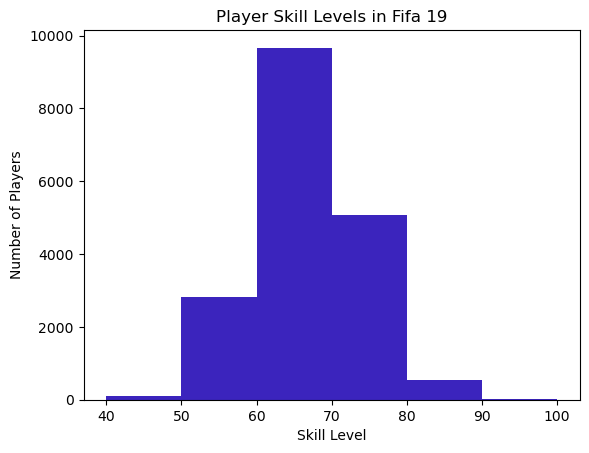

In [51]:
bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color='#3b24bd')
#or fifa['Overall']

plt.xticks(bins)

plt.xlabel('Skill Level')
plt.ylabel('Number of Players')
plt.title('Player Skill Levels in Fifa 19')

plt.savefig('Player Skill Levels Histogram.png', dpi=300)   
plt.show()

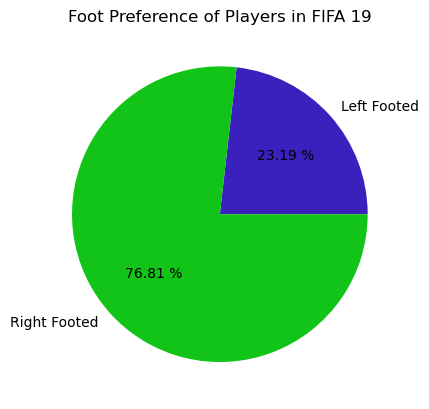

In [54]:
### Pie Chart for Number of Right and Left-footed Players

left_foot = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right_foot = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

plt.title('Foot Preference of Players in FIFA 19')

labels = ['Left Footed', 'Right Footed']
plt.pie([left_foot, right_foot], labels=labels, colors=['#3a20bd','#12c417'], autopct='%.2f %%')
#2f means show % upto TWO DECIMALS
# %% at end to show % after number

plt.savefig('Foot Preference Distribution Pie-chart.png', dpi=300)   
plt.show()

In [9]:
### Pie Chart for Weights of Players
fifa.Weight
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

playercount = 0

for w in fifa.Weight:
    w_kg = w*0.453592
    #w_kg = "%.2f" % w_kg
    fifa.loc[fifa['Unnamed: 0'] == playercount, 'Weight'] = w_kg
    playercount += 1

fifa.Weight

0        72.121128
1        83.007336
2        68.038800
3        76.203456
4        69.853168
           ...    
18202    60.781328
18203    77.110640
18204    67.131616
18205    69.853168
18206    79.832192
Name: Weight, Length: 18207, dtype: float64

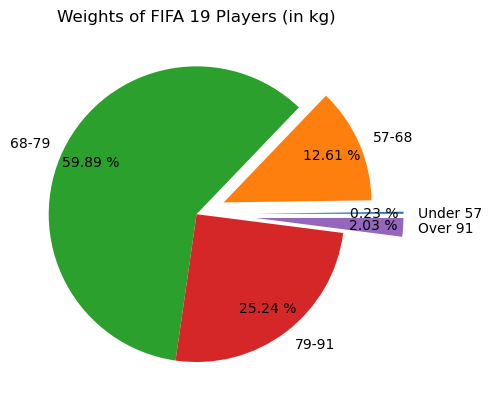

In [55]:
light = fifa.loc[fifa.Weight < 57].count()[0]
light_medium = fifa[(fifa.Weight >= 57) & (fifa.Weight < 68)].count()[0]
medium = fifa[(fifa.Weight >= 68) & (fifa.Weight < 79)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 79) & (fifa.Weight < 91)].count()[0]
heavy = fifa[fifa.Weight >= 91].count()[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['Under 57', '57-68','68-79','79-91', 'Over 91']
explode = (.4,.2,0,0,.4)
plt.style.use('default')


plt.title('Weights of FIFA 19 Players (in kg)')
plt.pie(weights, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')

plt.savefig('Weight distribution of Players Pie-chart.png', dpi=300)   

plt.show()

In [11]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


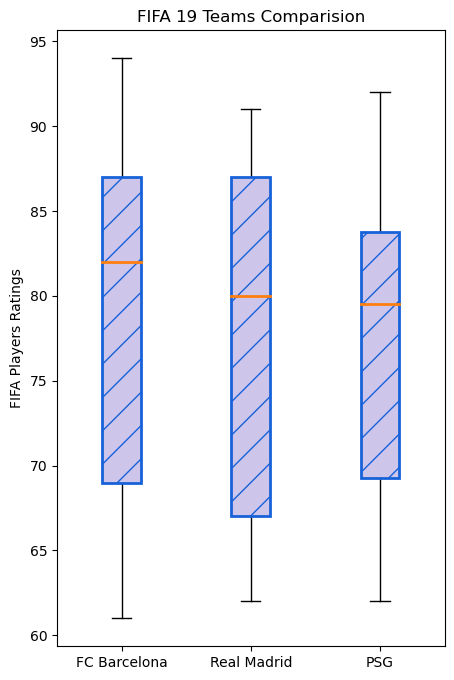

In [53]:
barcelona = fifa.loc[fifa.Club == 'FC Barcelona', 'Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid', 'Overall']
psg = fifa.loc[fifa.Club == 'Paris Saint-Germain', 'Overall']

plt.figure(figsize=(5,8))

labels =['FC Barcelona', 'Real Madrid', 'PSG']
plt.title('FIFA 19 Teams Comparision')
plt.ylabel('FIFA Players Ratings')

boxes = plt.boxplot([barcelona, madrid, psg], labels=labels, patch_artist=True, medianprops={'linewidth':2})  
#patch_artist to fill box with colour

for box in boxes['boxes']:    #['boxes'] means the box perimeter --- we are giving color to box perimeter here
    box.set(color= '#1862d9', linewidth=2)
    
    box.set(facecolor='#cec5eb')
    box.set(hatch = '/')

plt.savefig('FIFA 19 Teams Comparision Box Plot.png', dpi=300)   
plt.show()

In [29]:
list(fifa['Club'])

['FC Barcelona',
 'Juventus',
 'Paris Saint-Germain',
 'Manchester United',
 'Manchester City',
 'Chelsea',
 'Real Madrid',
 'FC Barcelona',
 'Real Madrid',
 'Atlético Madrid',
 'FC Bayern München',
 'Real Madrid',
 'Atlético Madrid',
 'Manchester City',
 'Chelsea',
 'Juventus',
 'Tottenham Hotspur',
 'Atlético Madrid',
 'FC Barcelona',
 'Real Madrid',
 'FC Barcelona',
 'Paris Saint-Germain',
 'FC Bayern München',
 'Manchester City',
 'Juventus',
 'Paris Saint-Germain',
 'Liverpool',
 'Real Madrid',
 'FC Bayern München',
 'Napoli',
 'Real Madrid',
 'Tottenham Hotspur',
 'FC Barcelona',
 'Arsenal',
 'FC Bayern München',
 'Real Madrid',
 'Real Madrid',
 'Tottenham Hotspur',
 'Milan',
 'Paris Saint-Germain',
 'Inter',
 'Paris Saint-Germain',
 'FC Barcelona',
 'Inter',
 'Napoli',
 'Manchester United',
 'Real Madrid',
 'Manchester United',
 'Lazio',
 'FC Barcelona',
 'Napoli',
 'Tottenham Hotspur',
 'Napoli',
 'FC Barcelona',
 'FC Barcelona',
 'Manchester City',
 'Manchester City',
 'Manche